<a href="https://colab.research.google.com/github/kunal266/Algo_Practice/blob/main/time_series_analysis/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
 import numpy as np
 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/RestaurantVisitors.csv",index_col='date',parse_dates=True)

In [4]:
df.index.freq='D'

In [5]:

df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df1 = df.dropna()

In [8]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [10]:
cols = ['rest1', 'rest2', 'rest3',
       'rest4', 'total']

In [11]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [12]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


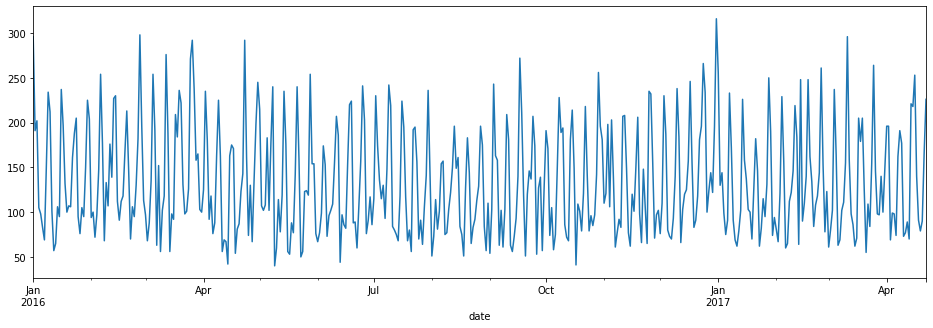

In [13]:
df1['total'].plot(figsize=(16,5))

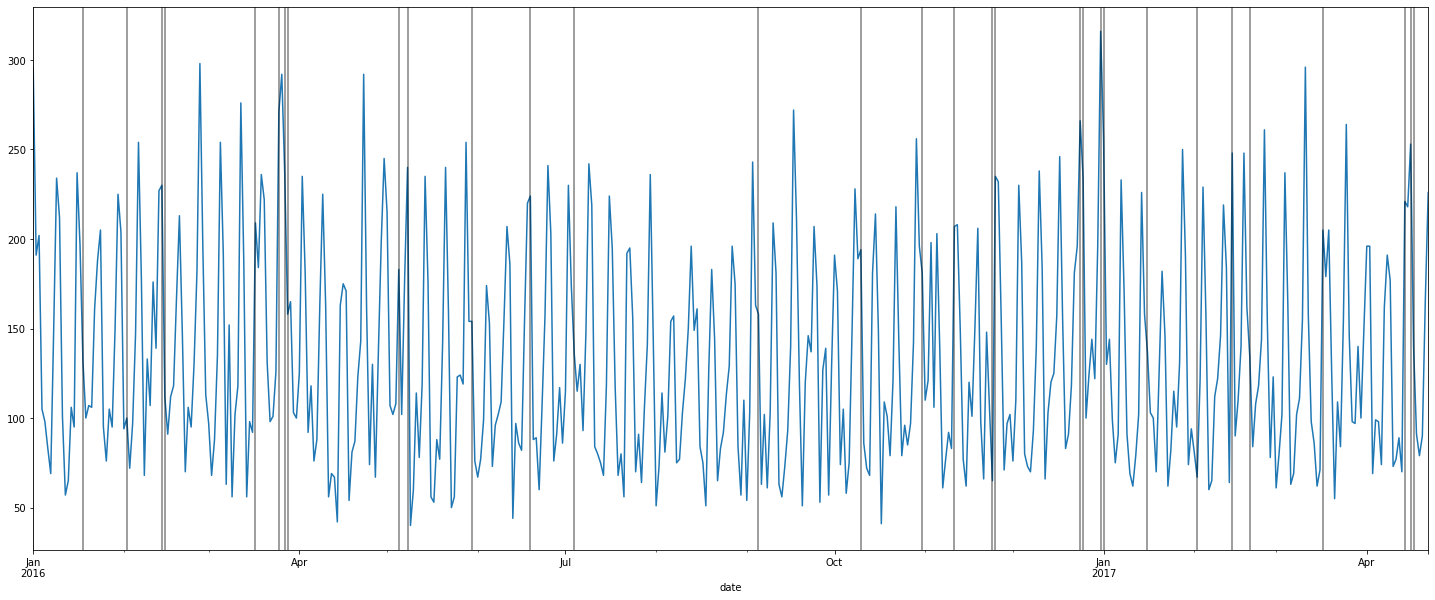

In [14]:
ax = df1['total'].plot(figsize=(25,10))

for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.5);

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

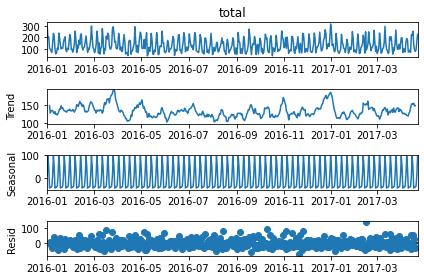

In [16]:
result = seasonal_decompose(df1['total'])
result.plot();

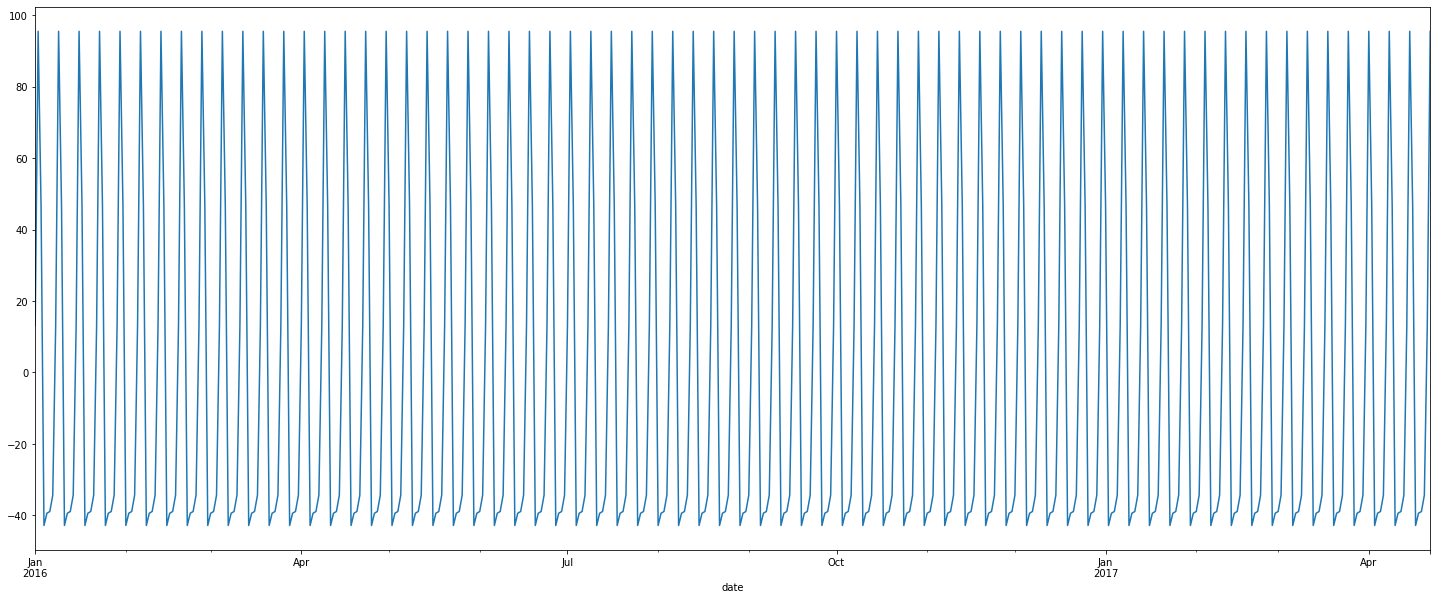

In [17]:
result.seasonal.plot(figsize=(25,10))

In [18]:
len(df1)

478

In [19]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [20]:

from pmdarima import auto_arima

In [22]:
auto_arima(df1['total'],seasonal=True,m=7,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=6.74 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=2.38 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=1.55 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.30 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=3.65 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=5340.375, Time=4.08 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4788.447, Time=2.79 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=1.26 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4950.814, Time=5.43 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=2.66 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=7.44 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4770.250, Time=2.29 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2381.125
Date:                   Fri, 18 Feb 2022   AIC                           4770.250
Time:                           16:25:32   BIC                           4786.928
Sample:                                0   HQIC                          4776.807
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.4774      1.408      2.469      0.014       0.717       6.238
ar.S.L7        0.9707      0.011     86.011      0.000       0.949       0.993
ma.S.L7       -0.7814      0.047    -16.596      0.000      -0.874      -0.689
sigma2      1219.6557     72.506     16.821      0.000    1077.546    1361.765
===================================================================================
Ljung-Box (L1) (Q):                  15.60   Jarque-Bera (JB):                72.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.78
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
model = SARIMAX(df1['total'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [34]:
results = model.fit()

In [35]:
start = len(train)
end= len(train)+len(test)-1

In [36]:
prediction = results.predict(start,end).rename('SARIMA MODEL')

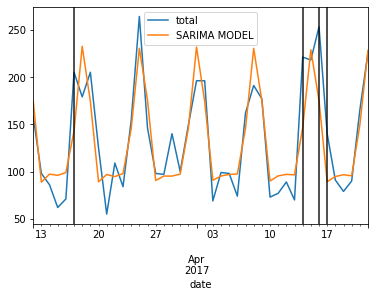

In [42]:
ax = test['total'].plot(legend=True)
prediction.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.9);


In [45]:
from statsmodels.tools.eval_measures import mse,rmse

In [44]:
rmse(test['total'],prediction)

30.328556441169845

In [46]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2378.846
Date:                             Fri, 18 Feb 2022   AIC                           4769.691
Time:                                     16:56:48   BIC                           4794.709
Sample:                                 01-01-2016   HQIC                          4779.527
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.3723      5.218      4.479      0.000      13.145      33.600
holiday       63.7977      6.576      9.701      0.000      50.908      76.687
ar.L1          0.1679      0.067      2.524      0.012       0.038       0.298
ar.S.L7        0.7732      0.046     16.893      0.000       0.684       0.863
ma.S.L7       -0.3512      0.099     -3.564      0.000      -0.544      -0.158
sigma2      1584.7444    145.664     10.879      0.000    1299.248    1870.240
===================================================================================
Ljung-Box (L1) (Q):                   3.32   Jarque-Bera (JB):                 8.34
Prob(Q):                              0.07   Prob(JB):                         0.02
Heteroskedasticity (H):               0.91   Skew:                             0.32
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model = SARIMAX(train['total'],exog=train[['holiday']],order= (1,0,0),seasonal_order=(1, 0, 1, 7),enforce_invertibility=False)

In [48]:
result = model.fit()

In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.208
Date:                             Fri, 18 Feb 2022   AIC                           4188.417
Time:                                     16:58:40   BIC                           4208.805
Sample:                                 01-01-2016   HQIC                          4196.463
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.9357      3.773     18.271      0.000      61.541      76.330
ar.L1          0.2101      0.044      4.762      0.000       0.124       0.297
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9581      0.022    -43.532      0.000      -1.001      -0.915
sigma2       779.3162     44.867     17.370      0.000     691.379     867.254
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.47
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
start=len(train)
end=len(train)+len(test)-1


In [52]:
predictions = result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with Exog')

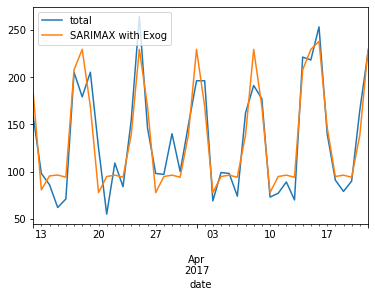

In [56]:
test['total'].plot(legend=True)
predictions.plot(legend=True)
for day in test.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.9);

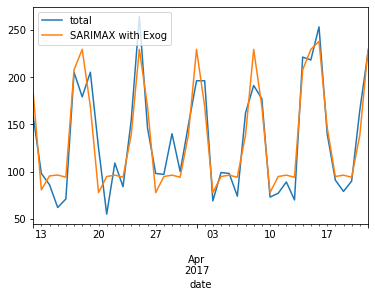

In [57]:
test['total'].plot(legend=True)
predictions.plot(legend=True)
for day in test.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.9);

In [58]:
rmse(test['total'],predictions)

22.92975014610225